In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\visha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [60]:
df=pd.read_csv("Credit Card Customer Data.csv")

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,LastActivityDate
0,1,87073,100000,2,1,1,0,2023-12-28
1,2,38414,50000,3,0,10,9,2024-01-31
2,3,17341,50000,7,1,3,4,2024-01-17
3,4,40496,30000,5,1,1,4,2023-09-16
4,5,47437,100000,6,0,12,3,2024-02-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sl_No                660 non-null    int64 
 1   Customer Key         660 non-null    int64 
 2   Avg_Credit_Limit     660 non-null    int64 
 3   Total_Credit_Cards   660 non-null    int64 
 4   Total_visits_bank    660 non-null    int64 
 5   Total_visits_online  660 non-null    int64 
 6   Total_calls_made     660 non-null    int64 
 7   LastActivityDate     660 non-null    object
dtypes: int64(7), object(1)
memory usage: 41.4+ KB


In [5]:
#Data type conversion
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sl_No                660 non-null    int64         
 1   Customer Key         660 non-null    int64         
 2   Avg_Credit_Limit     660 non-null    int64         
 3   Total_Credit_Cards   660 non-null    int64         
 4   Total_visits_bank    660 non-null    int64         
 5   Total_visits_online  660 non-null    int64         
 6   Total_calls_made     660 non-null    int64         
 7   LastActivityDate     660 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 41.4 KB


In [7]:
#Null Values Check
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
LastActivityDate       0
dtype: int64

In [8]:
#Basic Stats
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,LastActivityDate
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333,2023-11-14 15:07:38.181818112
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,2023-08-17 00:00:00
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000,2023-09-28 18:00:00
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000,2023-11-15 00:00:00
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000,2024-01-03 00:00:00
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000,2024-02-15 00:00:00
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317,NaN


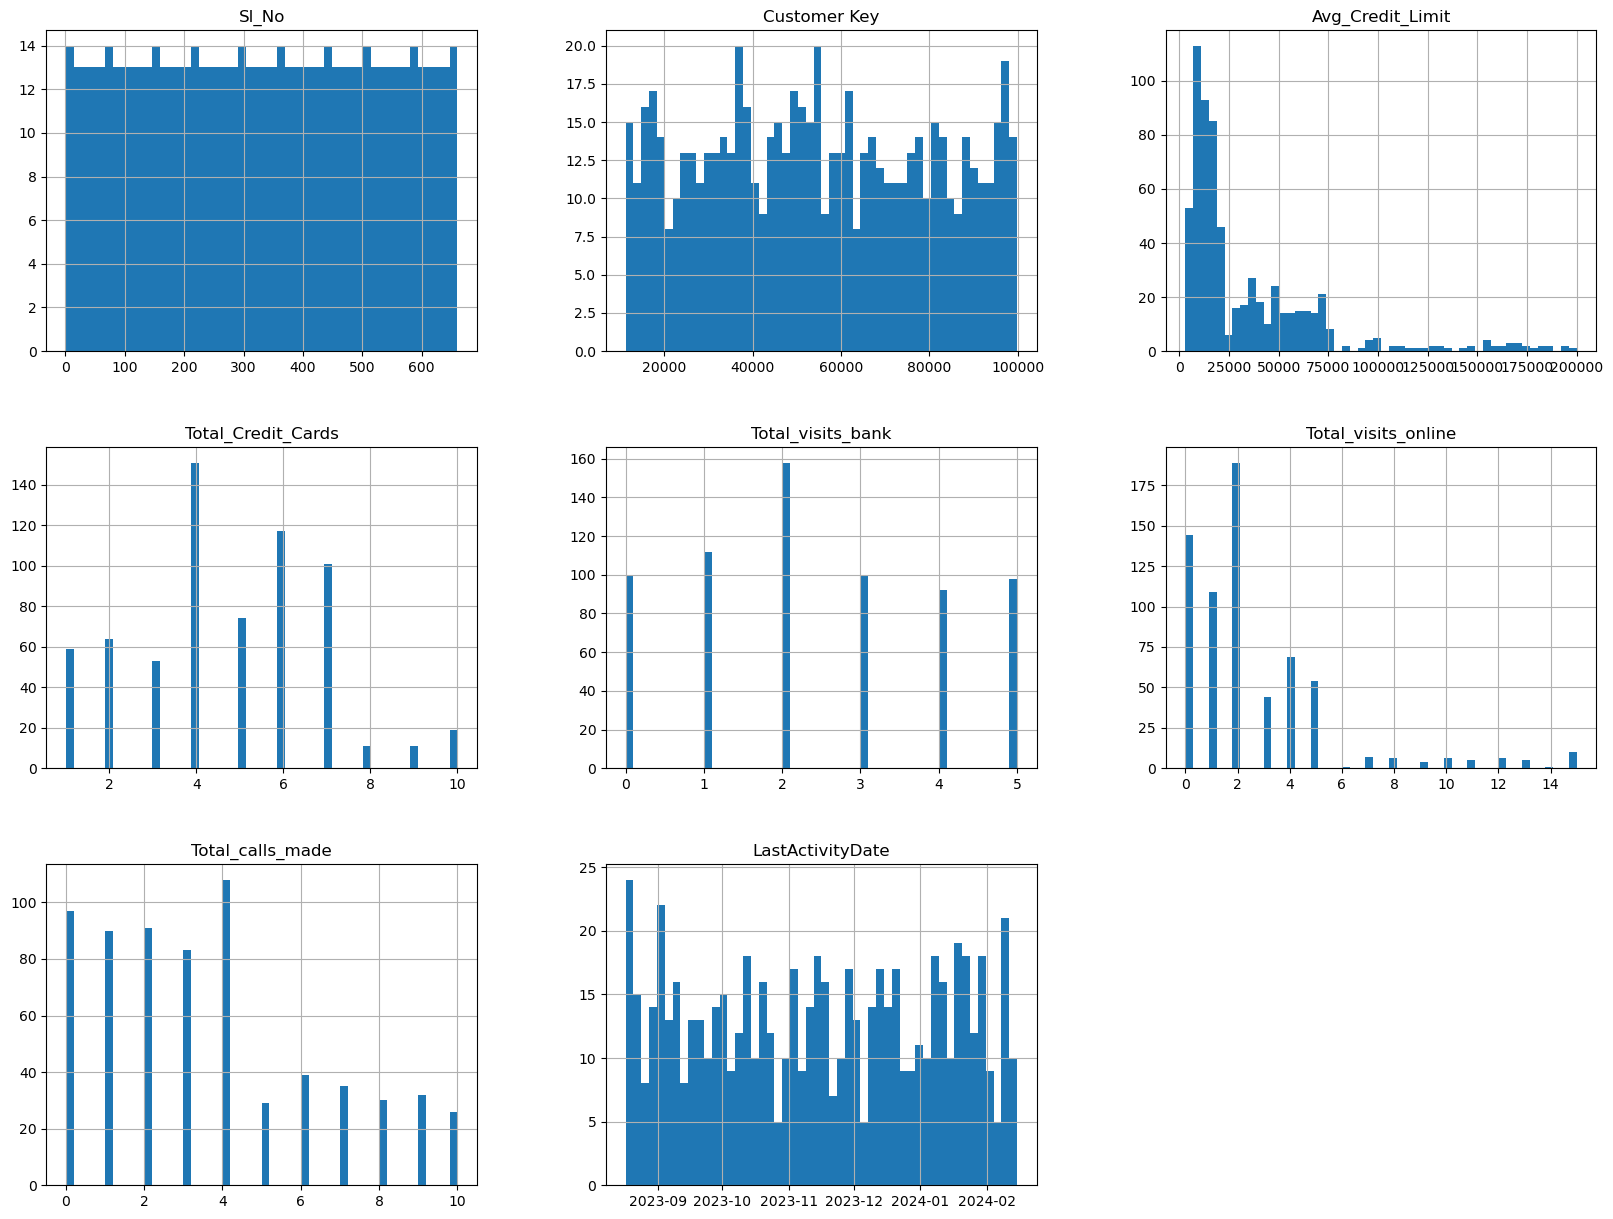

In [9]:
#Histograms
df.hist(bins=50, figsize=(20, 15))
plt.show()

KeyError: "None of [Index(['LastActivityDate'], dtype='object')] are in the [columns]"

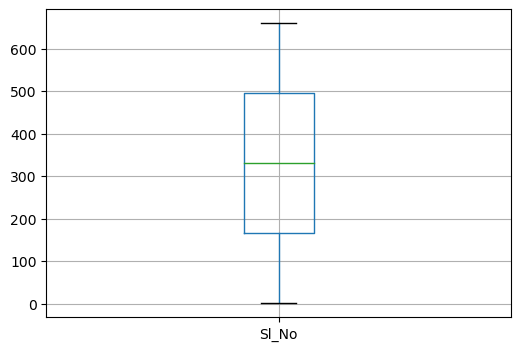

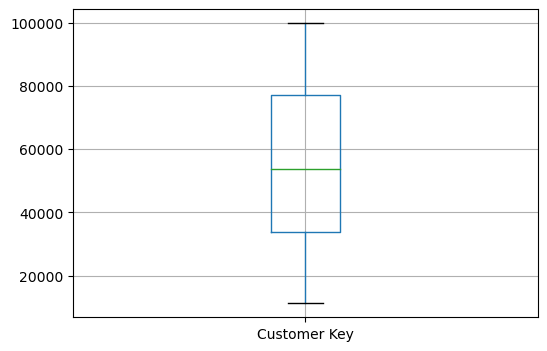

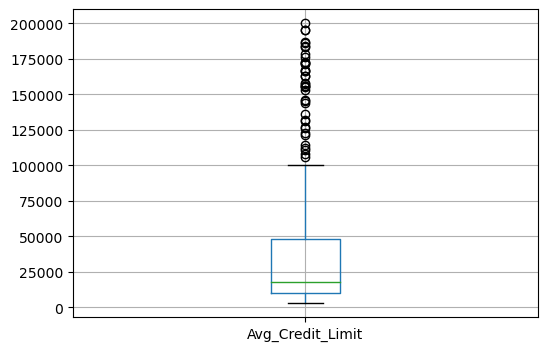

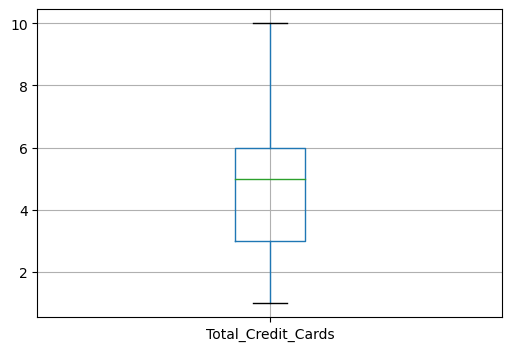

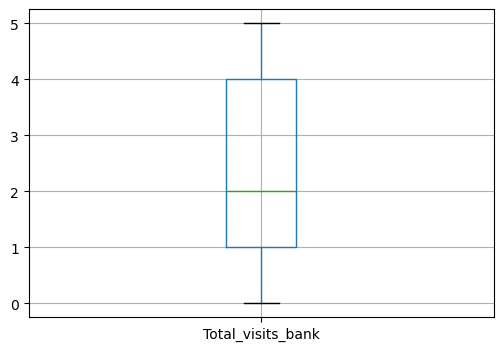

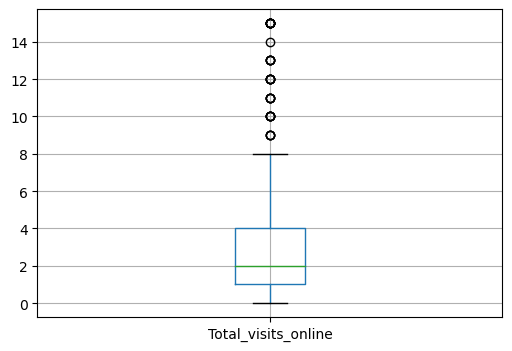

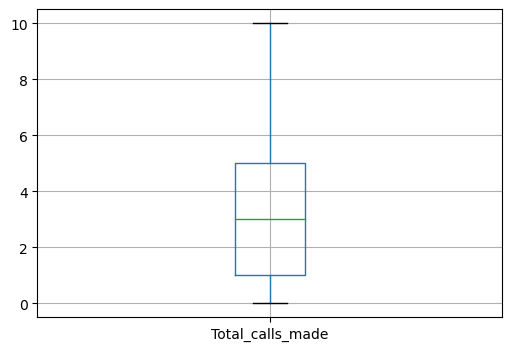

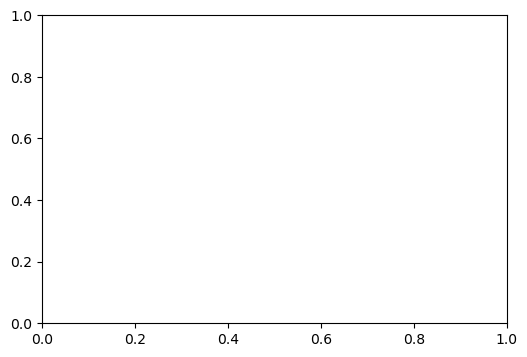

In [61]:
#Outliers
for column in df.columns:
    plt.figure(figsize=(6,4))
    df.boxplot(column=column)

In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

In [14]:
#Remove outliers
columns_with_outliers = ['Avg_Credit_Limit', 'Total_visits_online']  
for column in columns_with_outliers:
    df = remove_outliers_iqr(df, column)

KeyError: "None of [Index(['LastActivityDate'], dtype='object')] are in the [columns]"

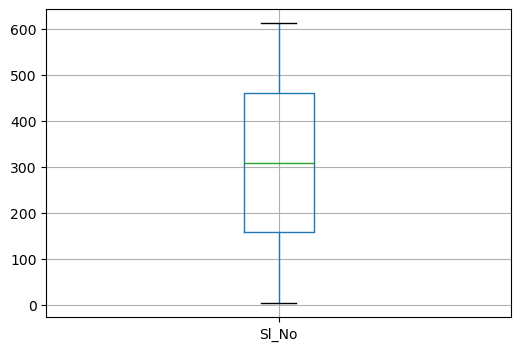

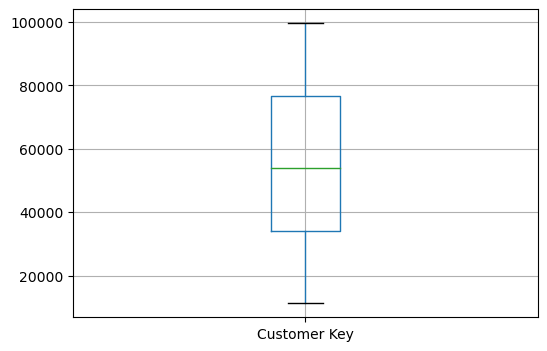

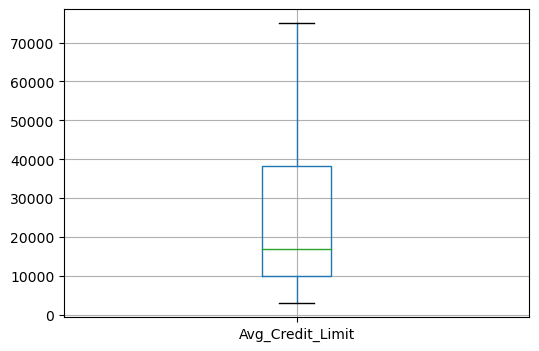

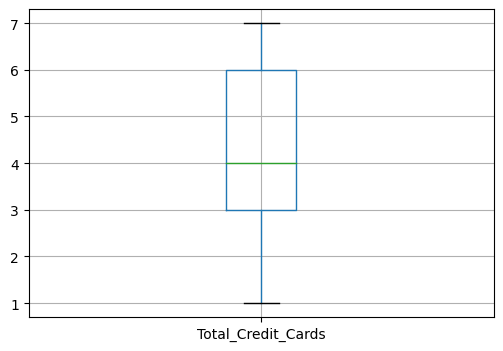

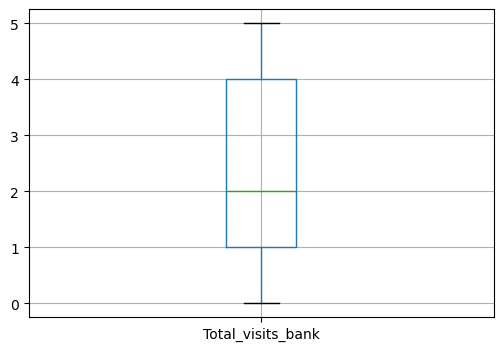

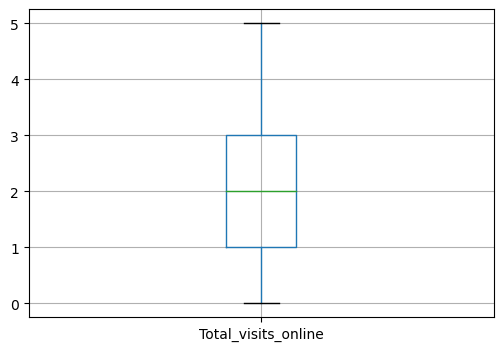

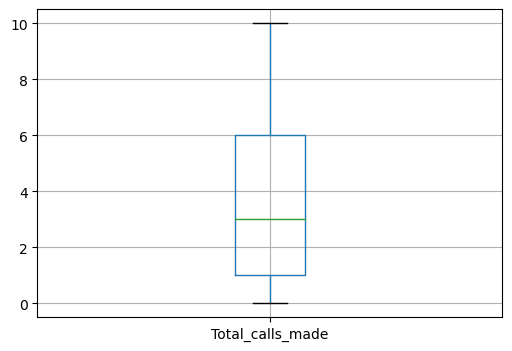

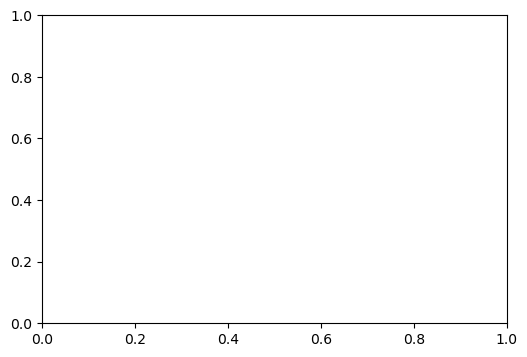

In [15]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [24]:
# Add random columns
np.random.seed(42)  # For reproducibility
df['Loyalty_Card'] = np.random.choice([0, 1], size=len(df))
df['Loyalty_Card_Purchase'] = np.random.choice([0, 1], size=len(df))
df['Married'] = np.random.choice([0, 1], size=len(df))

In [26]:
# Convert LastActivityDate to datetime
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])


In [30]:
# Calculate Recency
current_date = datetime(2024, 6, 25)
df['Recency'] = (current_date - df['LastActivityDate']).dt.days


In [32]:
# Calculate Frequency
df['Frequency'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']


In [33]:
# Monetary is Avg_Credit_Limit
df['Monetary'] = df['Avg_Credit_Limit']

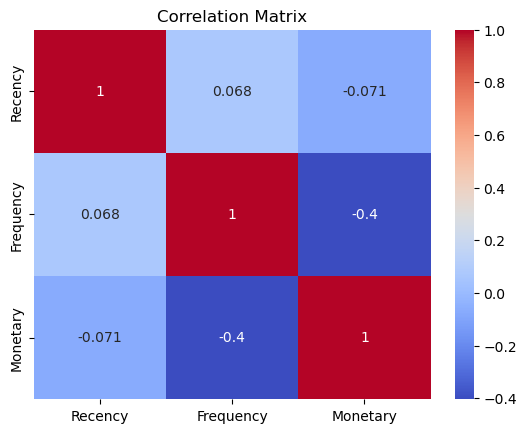

In [48]:
corr_matrix = pd.DataFrame(rfm_features, columns=['Recency', 'Frequency', 'Monetary']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Selecting RFM features
rfm_features = df[['Recency', 'Frequency', 'Monetary']]


In [35]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_features)


In [38]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


In [41]:
# Determine the optimal number of clusters using silhouette score
sse = []
silhouette_scores = []
range_n_clusters = range(2, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

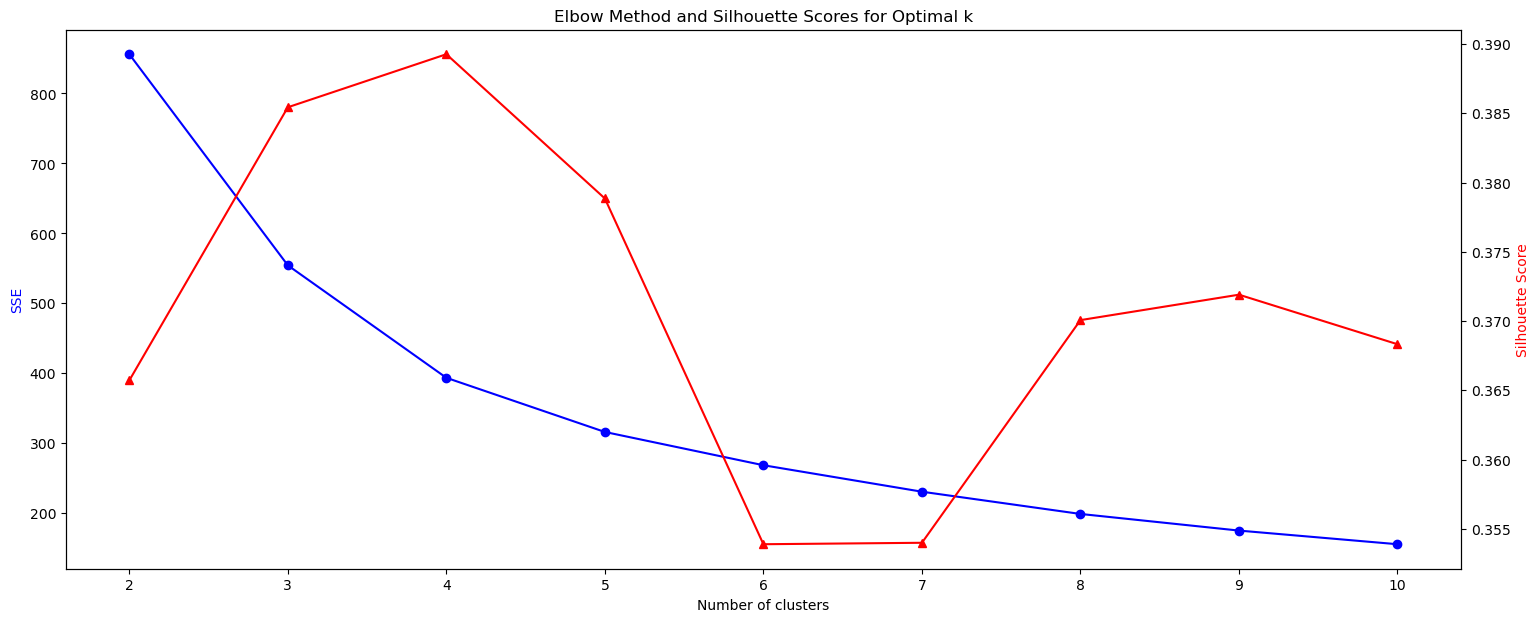

In [42]:
# Plotting Elbow Method and Silhouette Scores
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)
ax2 = ax1.twinx()

ax1.plot(range_n_clusters, sse, 'bo-')
ax2.plot(range_n_clusters, silhouette_scores, 'r^-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE', color='b')
ax2.set_ylabel('Silhouette Score', color='r')

plt.title('Elbow Method and Silhouette Scores for Optimal k')
plt.show()


In [43]:
# Find the optimal number of clusters based on silhouette score
optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]


In [44]:
# K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_features)


C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [46]:
# Adding the cluster labels to the original data
df['Cluster'] = clusters


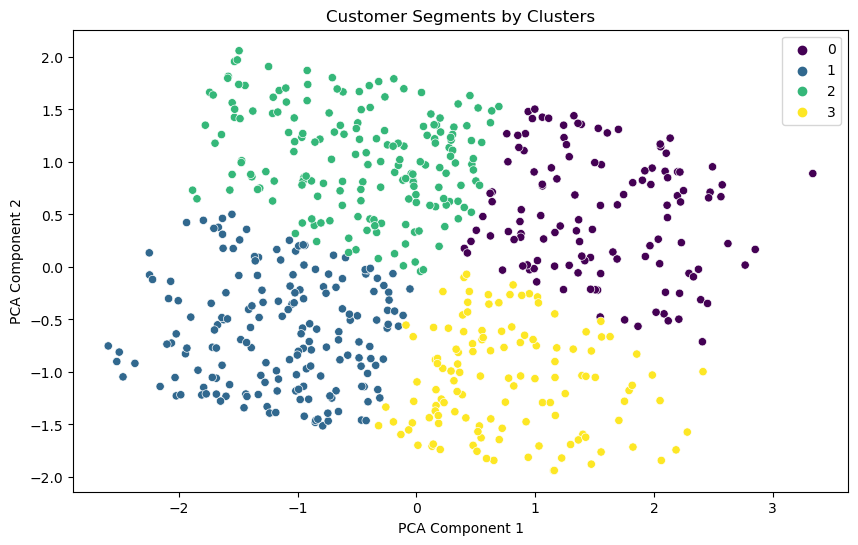

In [47]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments by Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [50]:
# Calculate RFM scores
df['RFM_Score'] = df['Recency'].rank(ascending=False) + df['Frequency'].rank(ascending=True) + df['Monetary'].rank(ascending=True)


In [52]:
# Segment customers based on RFM scores
df['RFM_Segment'] = pd.qcut(df['RFM_Score'], q=5, labels=["Low", "Below Average", "Average", "Above Average", "High"])


In [53]:
# Summary of RFM segments
print(df['RFM_Segment'].value_counts())


RFM_Segment
Low              122
Below Average    122
Average          122
High             122
Above Average    120
Name: count, dtype: int64


In [54]:
df.to_csv('output.csv', index=False)